# Title: Heart Disease Prediction

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">Author: Asif Shahzad</h1>

## Meta-Data
### Content
#### Column Descriptions:
* `id` (id for each patient)
* `age` (Age of the patient)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` (chest pain type) 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` (resting blood pressure on admission to the hospital)
* `chol` (serum cholesterol)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `Values`: (normal, stt abnormality, lv hypertrophy)
* `thalach`: (maximum heart rate achieved)
* `exang`: (exercise-induced angina (True/ False))
* `oldpeak`: (ST depression induced by exercise relative to rest)
* `slope`: (the slope of the peak exercise ST segment)
* `ca`: (number of major vessels (0-3) colored by fluoroscopy)
* `thal`: (normal,fixed defect,reversible defect)
* `num`: (the predicted attribute)

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


<span style="color: Blue; font-size: 350%; font-weight: bold;">Exploratory Data Analyis (EDA)</span>

In [3]:
 # import libraries
import pandas as pd
import numpy as np                                                    
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score   
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [4]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [5]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.shape

(920, 16)

In [7]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

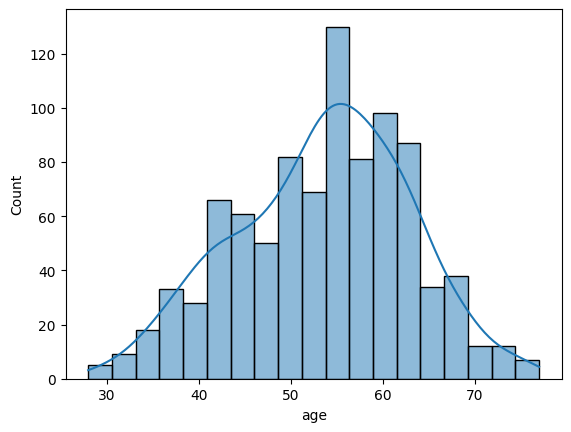

In [8]:
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


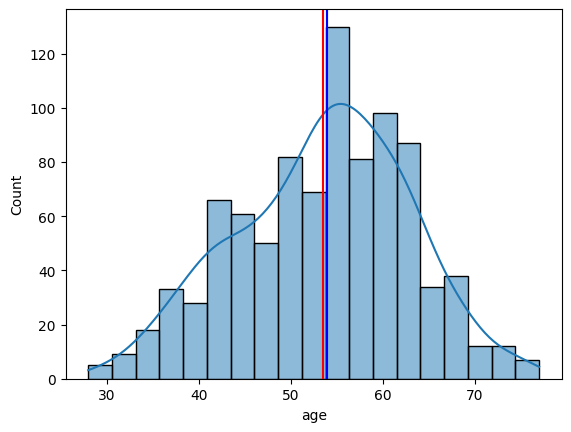

In [9]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

Let's explore the gender based distribution of the dataset for age column.

In [10]:
'''fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()'''

"fig = px.histogram(data_frame=df, x='age', color='sex')\nfig.show()"

In [11]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [12]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [13]:
# find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [14]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [15]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [16]:
'''fig = px.bar(df, x='dataset', color='sex')
fig.show()
print(df.groupby('sex')['dataset'].value_counts())'''

"fig = px.bar(df, x='dataset', color='sex')\nfig.show()\nprint(df.groupby('sex')['dataset'].value_counts())"

In [17]:
'''# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")
'''

'# make a plot of age column using plotly and coloring this by dataset column\nfig = px.histogram(data_frame=df, x=\'age\', color=\'dataset\')\nfig.show()\n\n# print the mean median and mode of age column grouped by dataset column\nprint(f"Mean of Data Set: {df.groupby(\'dataset\')[\'age\'].mean()}")\nprint("-------------------------------------")\nprint(f"Median of Data Set: {df.groupby(\'dataset\')[\'age\'].median()}")\nprint("-------------------------------------")\nprint(f"Mode of Data Set: {df.groupby(\'dataset\')[\'age\'].agg(pd.Series.mode)}")\nprint("-------------------------------------")\n'

#### Let's explore cp (Chest Pain) column: 

In [18]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

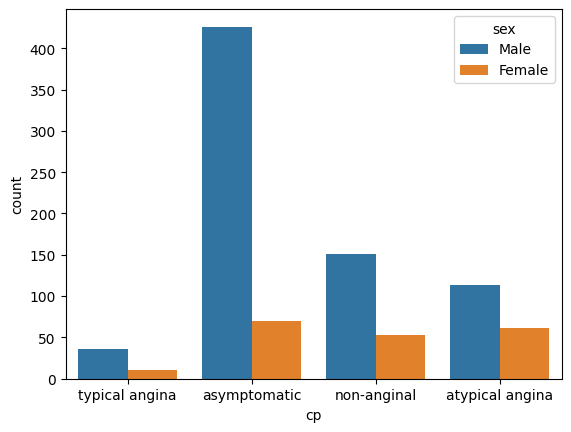

In [19]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

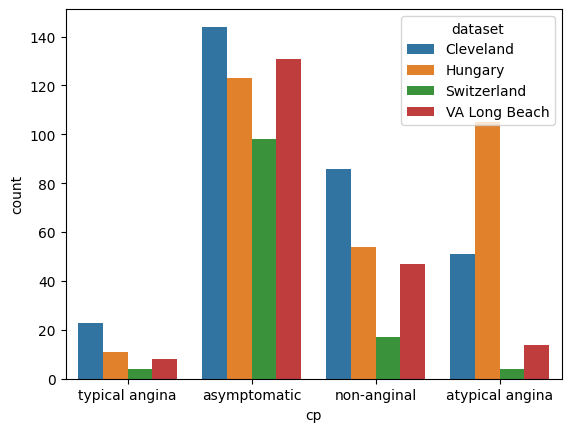

In [20]:
# count plot of cp column by dataset column
sns.countplot(df, x='cp', hue='dataset')

In [21]:
'''# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()'''

"# draw the plot of age column grouped by cp column using plotly\nfig = px.histogram(data_frame=df, x='age', color='cp')\nfig.show()"

#### Let'e explore the trestbps (resting blood pressure) column:

In [22]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

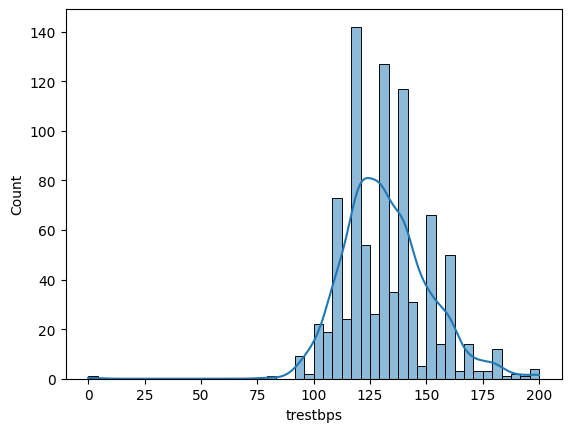

In [23]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

---

# Dealing with missing values

We are going to make a function to deal with missing values.

In [24]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [25]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [26]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [27]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [28]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.259653179190751 

RMSE = 17.270393725157668 

R2 = 0.06871571524967113 

Missing Values chol : 3.26%
MAE = 45.197471910112355 

RMSE = 63.36797521291232 

R2 = 0.6819039279708929 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.85 accuracy

Missing Values thalch : 5.98%
MAE = 16.843410404624276 

RMSE = 21.6786833980487 

R2 = 0.3166312431647781 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5766627906976745 

RMSE = 0.799348142856648 

R2 = 0.3912627383088154 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.11 accuracy



In [29]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

---

# Dealing with Outliers

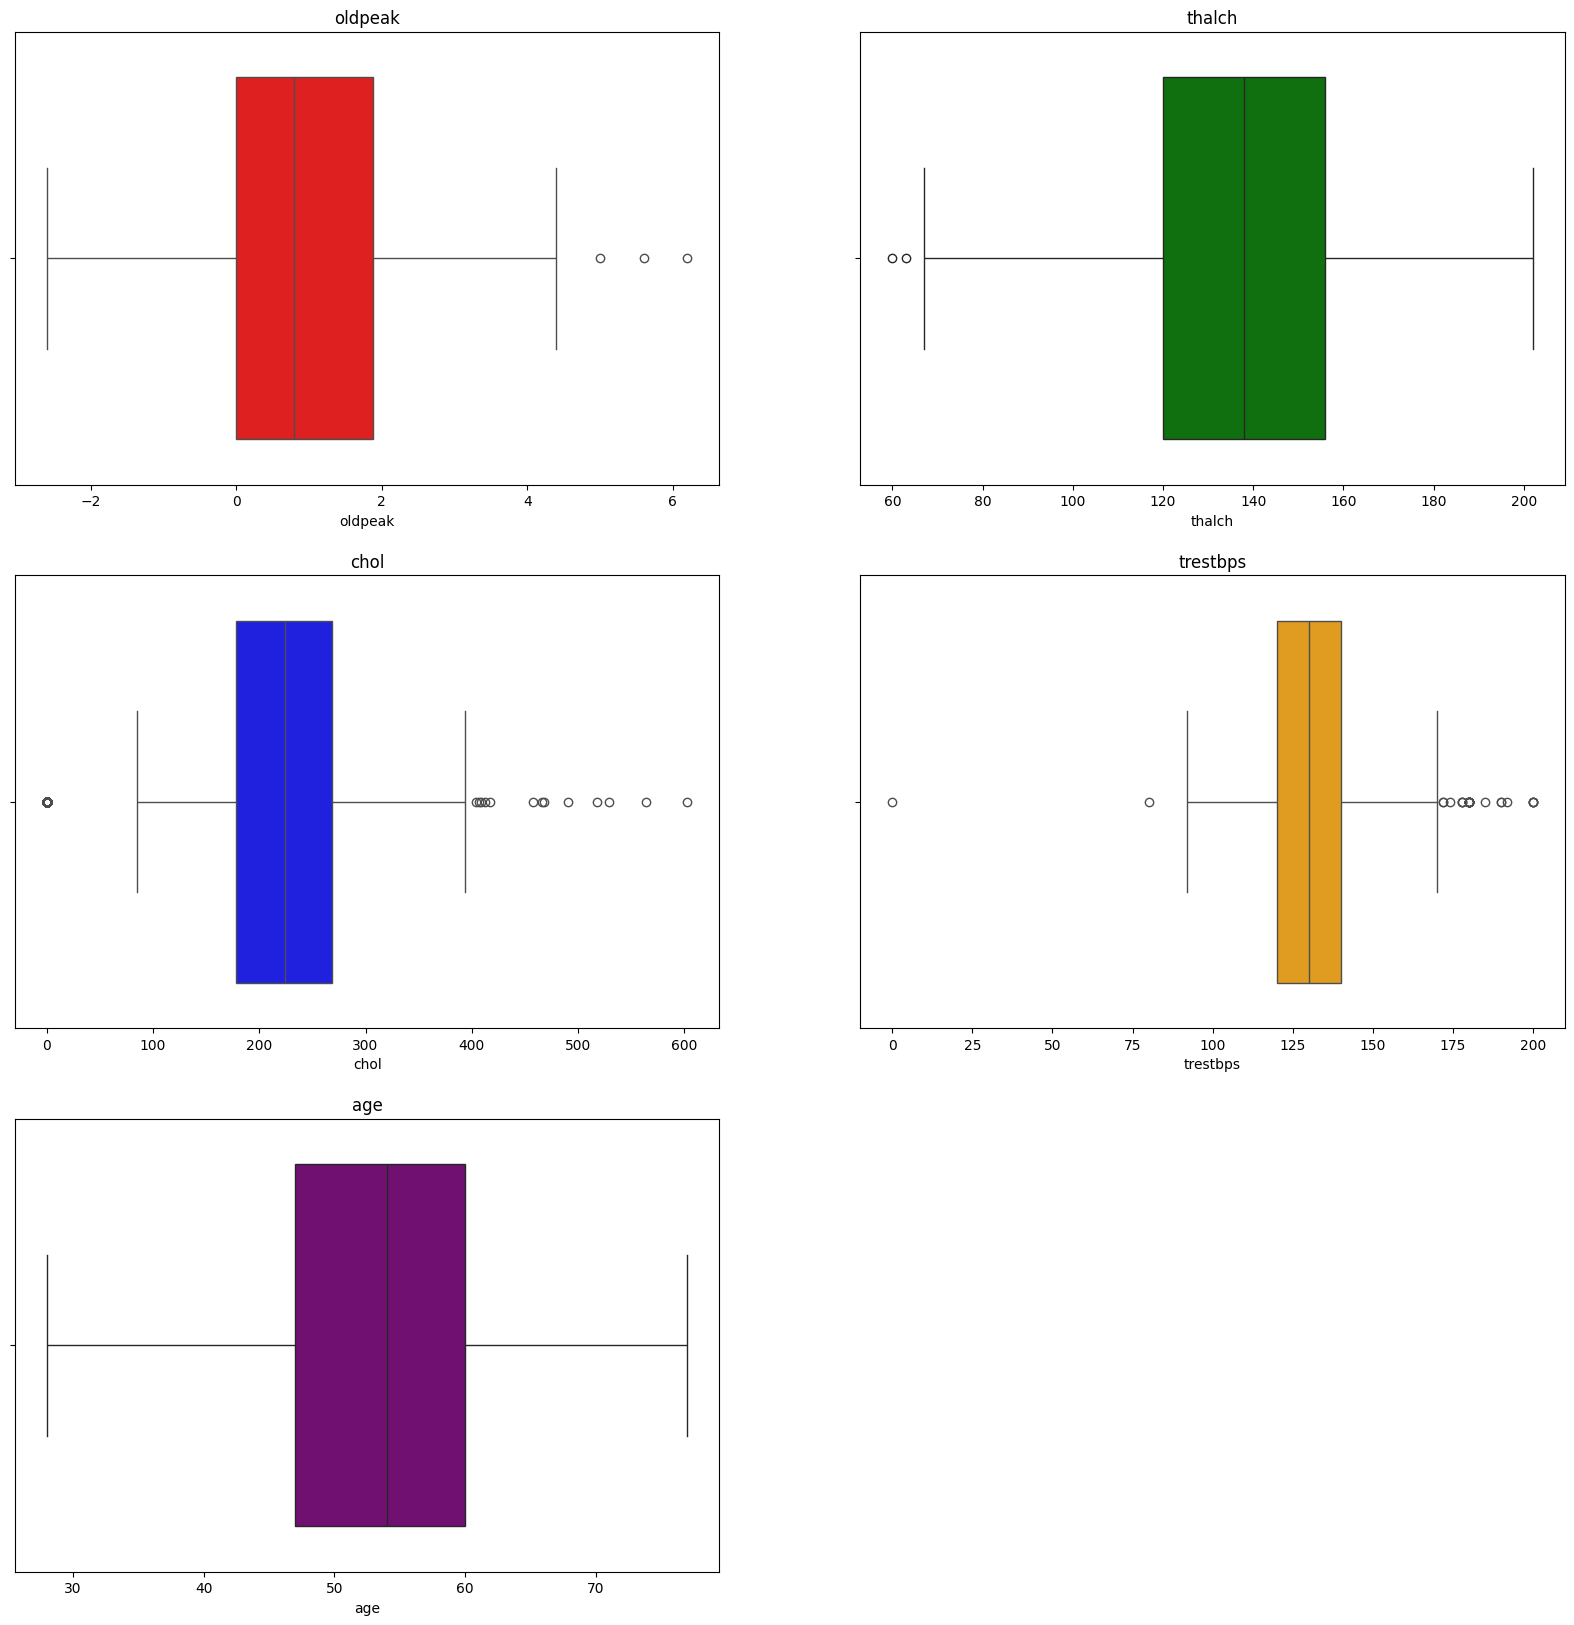

In [30]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [31]:
'''# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()'''

"# make box plots of all the numeric columns using for loop and plotly\nfig = px.box(data_frame=df, y='age')\nfig.show()\n\nfig = px.box(data_frame=df, y='trestbps')\nfig.show()\n\nfig = px.box(data_frame=df, y='chol')\nfig.show()\n\nfig = px.box(data_frame=df, y='thalch')\nfig.show()\n\nfig = px.box(data_frame=df, y='oldpeak')\nfig.show()"

In [32]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [33]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---

<span style="color: Blue; font-size: 350%; font-weight: bold;">Machine Learning</span>

In [34]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. 
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

In [51]:
# split the data into X and y
X = df.drop(['num','id','dataset'], axis=1)
y = df['num']

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(
    n_estimators=10, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=4, 
    max_features='sqrt', 
    bootstrap=True, 
    random_state=42
    )),
    ('Gradient Boosting', GradientBoostingClassifier(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
))
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
print("Best Model:", best_model)



Model: Random Forest
Cross-validation Accuracy: 0.5988856589147287
Test Accuracy: 0.6159420289855072

Model: Gradient Boosting
Cross-validation Accuracy: 0.6066254844961241
Test Accuracy: 0.605072463768116

Best Model: Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=5, n_estimators=10,
                                        random_state=42))])


In [60]:
import pickle
filename='heart_disease_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

---